# Анализ продаж компьютерных игр с последующим планированием кампании.

Уважаемый ревьюер, я уже работаю Аналитиком Данных некоторое время в крупнейшем международном онлайн магазине. Огромное спасибо Вашей платформе и Всем кто учавствовал в создании материалов и непосредственно обучении. Материал дался максимально легко и за короткий срок я получил позицию мидл. Останавливаться не планирую, хочу освоить МЛ и попробовать силы в Дата Сайнс. Я действительно много работал, чтобы получить эту должность и продолжаю работу над собой и своими знаниями, прошу учесть максимальную нехватку времени при максимальной мотивации. Если есть отличные методы, функции и другие приятные сюрпризы ускоряющие работу и повышающие экспертность, прошу оставить в комментарии.

Спасибо!\
Ваш коллега

## Общая информация

In [1]:
import pandas as pd
import numpy as np
import scipy as st
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [1]:
try:
    data = pd.read_csv('/Users/a1234/Documents/vscode-projects/projects_yandex/sprint_5/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
data.info()

NameError: name 'pd' is not defined

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод по информации во фрейме

## Предобработка

### Приведение названий согласно pep8. Изменение типа данных, частичная работа с пропусками.

In [4]:
# приведу название колонок к нижнему регистру
data.columns = [column.lower() for column in data.columns]

#### Series 'year'

Переименование, обработка пропусков,\
актуализация данных и смена типа данных.

In [5]:
# переименуем год релиза в 'year'
data.rename(columns={'year_of_release': 'year'}, inplace=True)

# перетянем дату игры с другой платформы
data['year'] = data.groupby('name')['year'].transform(
                        lambda x: x.fillna(method='ffill'))

# функция поиска четырехзначного числа из названия
def extract_four_digit_number(data):
    if isinstance(data, str):
        match = re.search(r'\b\d{4}\b', data)
        if match:
            number = int(match.group())
            return number - 1
    return None

# создание столбца для сохранения индекса значения
data['year_search'] = data['name'].apply(
                        extract_four_digit_number)

# объединение
data['year'] = data['year'].combine_first(
                        data['year_search'])

# применение функции с ограничением временного диапазона
data['year'] = data['year'].apply(
                        lambda x: x if 1980 < x < 2016 else None)

# изменить тип данных на int
data['year'] = data['year'].apply(
                        lambda x: x if pd.notna(x) else False).astype(int)


Полезный алгоритм! Сохраню для дальнейшей работы.\
Принцип: поиск всех строк с значением в .contains()\
без учета регистра.

In [6]:
data[data['name'].fillna('').str.contains('abracadabra', case=False)]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_search


#### Series 'rating'

Для удобства использования Даты и полноты анализа присвоим рейтингам значения минимального возраста,\
согласно ESRB.

In [7]:
# перетянем средний рейтинг ESRB для жанра
data['rating'] = data.groupby('name')['rating'].transform(
                        lambda x: x.fillna(method='ffill'))

In [8]:
# присвоим возрастные ограничения
data['age_min'] = data['rating'].replace(
    {'E': 0, np.nan: 0, 'M': 17, 'T': 13, 'E10+': 10, 'K-A': 6, 'AO': 18, 'EC': 3, 'RP': 17})

#### Новые столбцы

Продажи по регионам.

In [9]:
# суммируем продажи по регионам и запишим результат в новый Series
data['na_sum'] = data['na_sales'].sum()
data['eu_sum'] = data['eu_sales'].sum()
data['jp_sum'] = data['jp_sales'].sum()
data['other_sum'] = data['other_sales'].sum()

Сумма продаж 1 релиза.

In [10]:
# суммируем продажи
data = data.assign(total_sales=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1))

#### Garbege collector

In [11]:
# локальный Garbege Collector: дропну пропуски и лишние данные
try:
    data.drop('year_search', axis=1, inplace=True)
except:
    print('empty')

data.dropna(subset=['name'], inplace=True)
data = data[data['year'] != 0]

# избавимся от неинформативных строк
condition = (data['total_sales']) > .02
data = data.loc[condition].dropna(subset=['rating', 'user_score', 'critic_score'], how='all')
del condition

# изменение типа данных на int
data['age_min'] = data['age_min'].apply(
                        lambda x: x if pd.notna(x) else False).astype(int)
data['critic_score'] = data['critic_score'].apply(
                        lambda x: x if pd.notna(x) else False).astype(int)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
    
data = data.drop_duplicates()

data = data.reset_index(drop=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9214 entries, 0 to 9213
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          9214 non-null   object 
 1   platform      9214 non-null   object 
 2   year          9214 non-null   int64  
 3   genre         9214 non-null   object 
 4   na_sales      9214 non-null   float64
 5   eu_sales      9214 non-null   float64
 6   jp_sales      9214 non-null   float64
 7   other_sales   9214 non-null   float64
 8   critic_score  9214 non-null   int64  
 9   user_score    6861 non-null   float64
 10  rating        9141 non-null   object 
 11  age_min       9214 non-null   int64  
 12  na_sum        9214 non-null   float64
 13  eu_sum        9214 non-null   float64
 14  jp_sum        9214 non-null   float64
 15  other_sum     9214 non-null   float64
 16  total_sales   9214 non-null   float64
dtypes: float64(10), int64(3), object(4)
memory usage: 1.2+ MB


### Лор первой части проекта:

1. Загрузка нужных библиотек
2. Создание ДатаФрейма
3. Изучение информации
4. Приведение к нижнему регистру
5. Столбец 'year': переименование, работа с пропусками, изменение типа.
- Найден отличный метод поиска.
6. Столбец 'rating': обработка пропусков, изменение рейтинга на возрастные ограничения, переименование, смена типа.
7. Подсчет сумм продаж по регионам, создание новых колонок
8. Подсчет сумарных продаж в мире для каждой строки
9. Garbege collector: дроп лишних строк, переменных и значений, обновление индексов. Инфа по оставшимся строкам


### Вывод по первой части:

1. Предоставлены 16000 строк
2. Информация о играх для разных платформ проданых с 1980 по 2016
3. Есть суммы продаж в 4 условных регионах: NA, EU, JP и остальной мир
4. Есть 2 субъективные оценки: критиков и юзеров

Категориальные данные:
- name
- platform
- genre
- rating

Категориальные:
- year
- na_sales
- eu_sales
- jp_sales
- other_sales
- total_sales
- critic_score
- user_score
- age_min
- na_sum
- eu_sum
- jp_sum
- other_sum

***user_score*** содержит ***tbd*** - to_be_defined (данные будут подгружены)

Пропуски по столбцам name - удалены, так как не могут быть восстановлены.\
Пропуски по году релиза и платформе: восстановлены по-возможности.\
Пропуски для рейтинга подтянуты 2 методами:
- по имени игры с другой строки
- по группировке имени с присвоением жанра

Пропуски колонок оценок и продаж удалены (после извлечения полезной информации\
для пропусков из других колонок) по логике: строки с продажей суммой меньше .04\
по всем регионам, и пропусками Одновременно по 3 колонкам (rating, user_score, critic_score).\
На основе строки рейтинга создана колонка возрастных ограничений (равномерное непрерывное распределение).

## Исследовательский анализ данных

### Проверка актуальности данных по году релиза

ESRB начал деятельность с 1994, до этого индустрия почти не регламентировалась.\
также научно-технические прогрес поставил производство на поток.\
Проверим предположения, и в случае невостребованности - откинем лишнее.

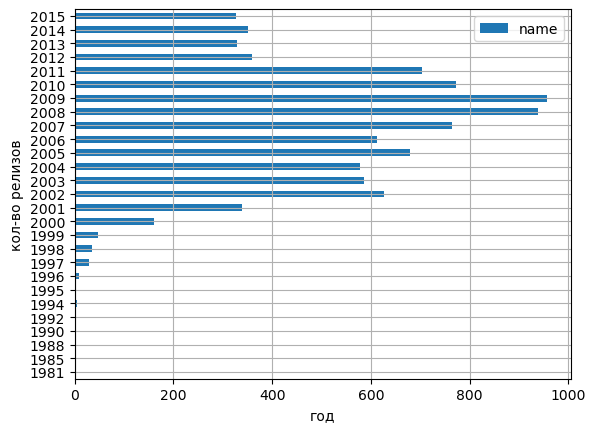

In [13]:
# построим plot без лишних переменных
data.pivot_table(
    index='year',
    values='name',
    aggfunc='count',
    fill_value=0).plot(grid=True,
                       kind='barh')

# plt.title('количество релизов')
plt.xlabel('год')
plt.ylabel('кол-во релизов')
plt.legend()
plt.show()

Условный garbege collector уже избавил от лишних значений, значит данные максимально актуализированы (потери составили 42%).

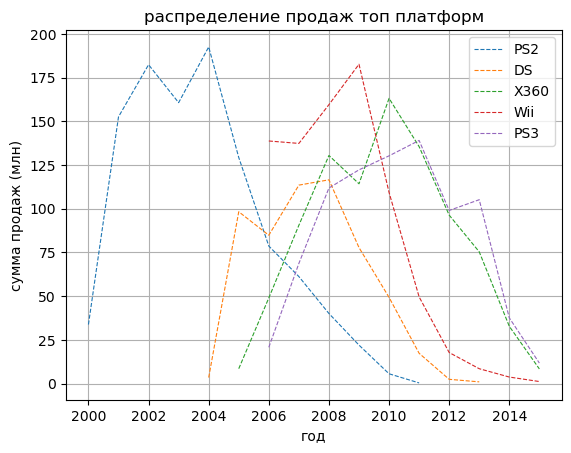

In [14]:
# проверим изменения продаж по консолям за весь отчетный период 
try:
    for i in list(data.groupby('platform')['year'].sum().nlargest(5).index):
        data[data['platform']==i].groupby('year')['total_sales'].sum().plot(label=i,
                                                                            grid=True,
                                                                            linestyle='--',
                                                                            linewidth=0.8)
    
    plt.title('распределение продаж топ платформ')
    plt.xlabel('год')
    plt.ylabel('сумма продаж (млн)')
    plt.legend()
    plt.show()
except:
    print('error')

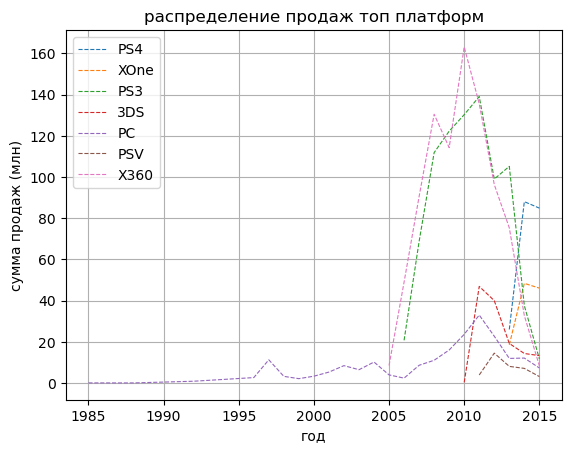

In [15]:
# тоже самое проделаем с ограничением в несколько последних лет
# наименования платформ сохраним в лист

try:
    top_platforms = []
    for i in list(data.query('year >= 2015').groupby('platform')['year'].sum().nlargest(7).index):
        top_platforms.append(i)
        data[data['platform']==i].groupby('year')['total_sales'].sum().plot(label=i,
                                                                            grid=True,
                                                                            linestyle='--',
                                                                            linewidth=0.8)
    
    plt.title('распределение продаж топ платформ')
    plt.xlabel('год')
    plt.ylabel('сумма продаж (млн)')
    plt.legend()
    plt.show()
except:
    print('error')

На графиках видно "сезонность" приставок. Геймдевы меняют ориентир разработки на новые консоли,\
игровые движки и прочие технологии, что естественно. Поэтому список из 7 консолей остается,\
но более старые версии **PS3** и **X360** под вопросом, приставкам больше 10 лет: и все же код не обманывает.

## Анализ учетного периода (двух последних лет)

### Лидеры продаж среди игровых платформ

              PS4       XOne        PS3        3DS         PC        PSV  \
count  100.000000  60.000000  35.000000  32.000000  32.000000  24.000000   
mean     0.849100   0.767833   0.334286   0.415313   0.228125   0.130000   
std      1.452088   1.016825   0.480039   0.680109   0.300381   0.108187   
min      0.030000   0.030000   0.030000   0.030000   0.030000   0.030000   
25%      0.090000   0.110000   0.050000   0.040000   0.050000   0.047500   
50%      0.240000   0.295000   0.190000   0.160000   0.135000   0.100000   
75%      0.865000   1.227500   0.450000   0.367500   0.222500   0.170000   
max      8.580000   4.490000   2.700000   3.050000   1.280000   0.410000   

            X360  
count  23.000000  
mean    0.363043  
std     0.385551  
min     0.030000  
25%     0.085000  
50%     0.230000  
75%     0.425000  
max     1.570000  


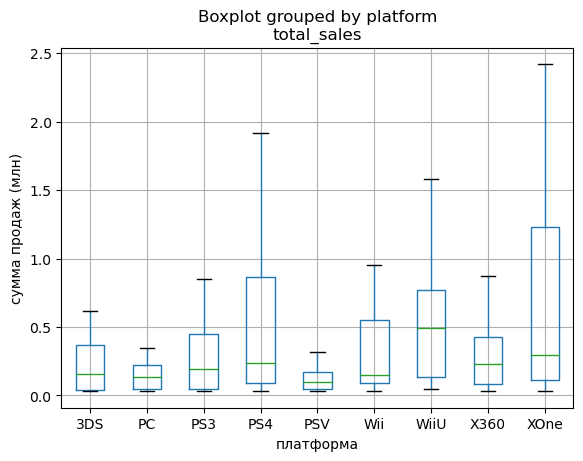

In [16]:
# найдем квартили прибыли игр относительно платформы
# выбросы опущены

try:
    data.query('year >= 2015').boxplot(column='total_sales',
                                       by='platform',
                                       showfliers=False);

    describe_frame = pd.DataFrame()

    for i in top_platforms:
        sales_description = data.query('year >= 2015 and platform == @i')['total_sales'].describe()
        describe_frame[i] = sales_description
    print(describe_frame)
    plt.xlabel('платформа')
    plt.ylabel('сумма продаж (млн)')
    plt.show()
except:
    print('error')

***Boxplot прибыли игр относительно консоли***
выбросы аннулированы

Наиболее удачными и прыбыльными являются игры вышедшие под относительно\
свежие игровые платформы. Сезонность подтвердилась, хотя **PS3** и **X360**\
все еще популярны и прибыльны.

### Влияние критиков и оценок пользователей

Для изучения возьмем наиболее популярные платформы последних  **PS4** и **XOne**.\
Это безусловные лидеры по успешности в плане прибыли в расчете релиз.

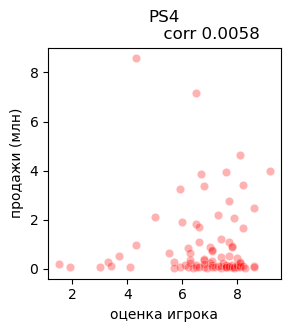

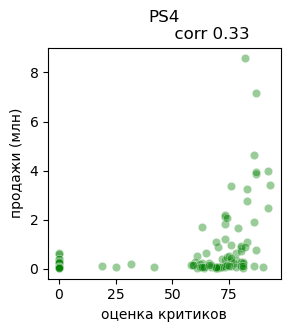

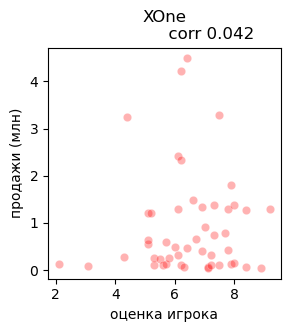

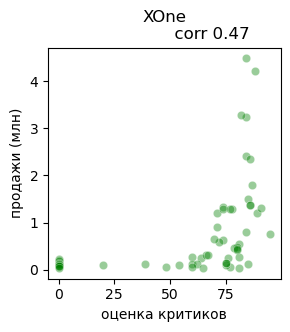

In [17]:
# автоматизированный цикл для анализа игр
# в цикле можно выбрать количество итераций - количество анализируемых игр


try:
    # смени число в итерации циклов
    for i in top_platforms[:2]:
        # для автоматизации создадим цикл
        platform_data = data.query('year >= 2015 and platform in @i')

        # оценка игрока
        plt.figure(figsize=(3, 3))
        sns.scatterplot(x='user_score', y='total_sales', data=platform_data.sort_values('user_score').loc[
            platform_data['platform']==i], alpha=0.3, c='r')
        # подгрузим corr в титл
        corr = platform_data[platform_data['platform']==i]['total_sales'].corr(
                                            platform_data['user_score'])
        plt.title(f'''{i}
                  corr {corr:.2}''')
        plt.xlabel('оценка игрока')
        plt.ylabel('продажи (млн)')
        plt.show()
        
        # оценка критика
        plt.figure(figsize=(3, 3))
        sns.scatterplot(x='critic_score', y='total_sales', data=platform_data.sort_values('user_score').loc[
            platform_data['platform']==i], alpha=0.4, c='g')
        
        # подгрузим corr в титл
        corr = platform_data[platform_data['platform']==i]['total_sales'].corr(
                                            platform_data['critic_score'])
        plt.title(f'''{i}
                  corr {corr:.2}''')
        plt.xlabel('оценка критиков')
        plt.ylabel('продажи (млн)')
        plt.show()
except:
    print('error')

Отчетливо видна зависимость прибыли от высокой оценки критика на платформах **PS4** и **XOne**.\
В то время, как оценка пользователя, что вполне ожидаемо, практически не влияет на продажи.

### Анализ игр по жанрам

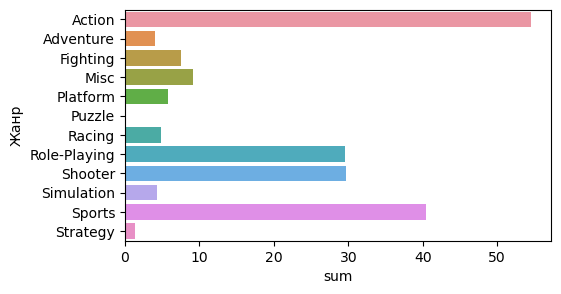

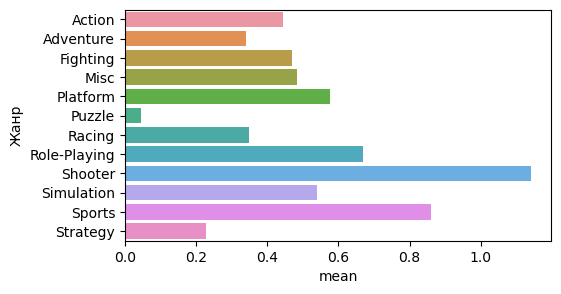

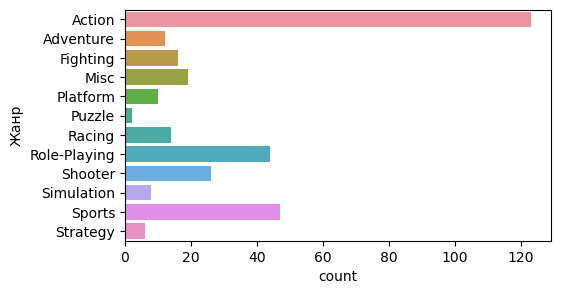

In [18]:
# пожанровые гистограммы
try:
    # для удобства использования создадим новый фрейм
    genre_data = data.query('year >= 2015').pivot_table(
                                        index='genre',
                                        values='total_sales',
                                        aggfunc=['sum', 'mean', 'count'])
    # сброс индекса
    genre_data.columns = [t[0] if t[0] else t[1] for t in genre_data.columns]
    
    # цикл для каждого показателя
    for i in list(genre_data.columns):
        # параметры гистограм
        plt.figure(figsize=(5.5, 3))
        sns.barplot(x=i, y=genre_data.index, data=genre_data)
        plt.ylabel('Жанр')
        plt.show() 
except:
    print('error')

Агрегируя полученную информацию можно сделать вывод, что любимыми играми\
у пользователей являются:
- шутеры
- акшены
- спортивные
- ролевые (вот это действительно открытие)
Они являются самыми тирражируемыми и прибыльных. Остаются актуальными\
даже при большом выборе предложений. Непотопляемые гимганты.

И все же максимальная выгода для магазина прячется в других жанрах.\
При минимальном количестве релизов показывают рекордные продажи:
- симуляторы
- стратегии
- риключенческие
- файтинги
- платформеры
- райсинг
Возможно, найден идеальный вариант. Осталось узнать спрос у пользователей.

Худшими в рейтинге остался:
- пазл

#### Garbege collector

In [19]:
del top_platforms, describe_frame, platform_data, genre_data, corr

## Портрет пользователя по регионам

Полностью автоматизирую процесс. Кода много: время - деньги.

### NA - Северная Америка

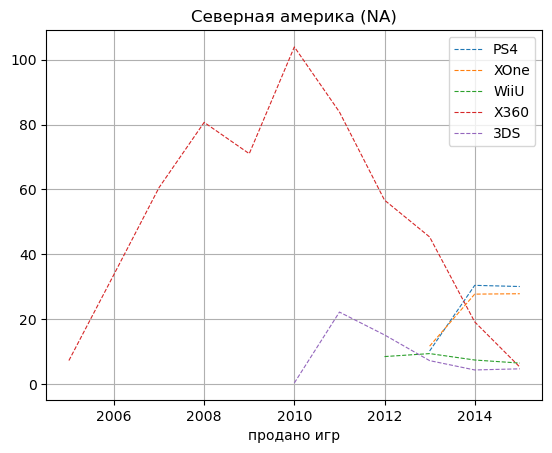

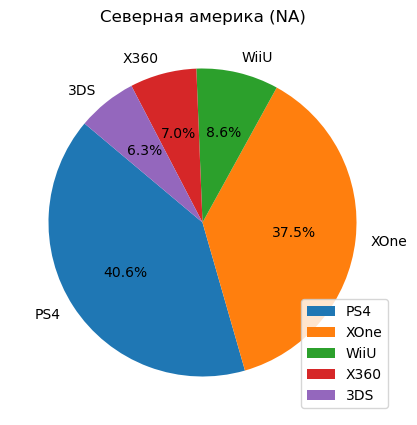

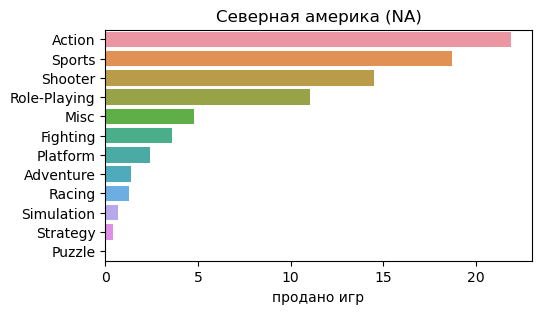

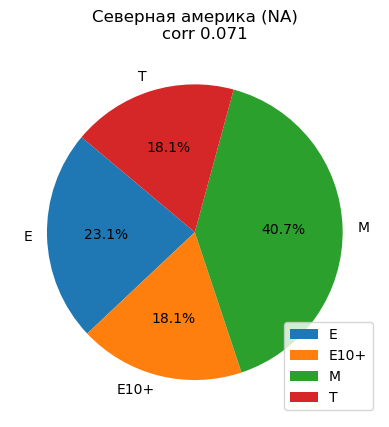

In [20]:
# автоматизация под все регионы
region = 'na_sales'
title = 'Северная америка (NA)'

# график объема продаж платформ
try:
    # гистограмма №1
    for i in list(data.query('year >= 2015').groupby('platform')[region].sum().nlargest(5).index):
        data[data['platform']==i].groupby('year')[region].sum().plot(label=i,
                                                                            grid=True,
                                                                            linestyle='--',
                                                                            linewidth=0.8)
    plt.title(title)
    plt.xlabel('продано игр')
    plt.ylabel('')
    plt.legend()
    plt.show()

    # гистограмма №2
    plt.figure(figsize=(5, 5))
    data.query('year >= 2015').groupby('platform')[region].sum().nlargest(5).plot.pie(y='sum', autopct='%.1f%%', startangle=140)
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.show()

    # гистограмма №3
    genre_data = data.query('year >= 2015').pivot_table(
                                        index='genre',
                                        values=region,
                                        aggfunc=['count', 'sum'])
    # сброс индекса
    genre_data.columns = [t[0] if t[0] else t[1] for t in genre_data.columns]
    genre_data.sort_values(by='sum', ascending=False, inplace=True)

    plt.figure(figsize=(5.5, 3))
    sns.barplot(x=genre_data['sum'], y=genre_data.index, data=genre_data)
    plt.xlabel('продано игр')
    plt.ylabel('')
    plt.title(title)
    plt.show() 
except:
    print('error')

plt.close('all')

# гистограмма №4
corr = data.query('year >= 2015')[region].corr(data.query('year >= 2015')['age_min'])

rating_data = data.query('year >= 2015').pivot_table(
                                    index='rating',
                                    values= region,
                                    aggfunc=['count','sum'])
# сброс индекса
rating_data.columns = [t[0] if t[0] else t[1] for t in rating_data.columns]
# параметры гистограм
plt.figure(figsize=(5, 5))
plt.close('all')
rating_data.plot.pie(y='sum', autopct='%.1f%%', startangle=140)
plt.title(f'''{title}
    corr {corr:.2}''')
plt.xlabel('')
plt.ylabel('')
plt.show()

Самыми тирражируемыми платформами в Северной Америке остаются\
игровые консоли. Свежие версии от техно-гигантов **PS** и **XBox**\
захватили игровой рынок. И все же  **X360** еще держит продажи\
на отличном уровне, но тренд говорит неминуемом переходе на свежую\
версию консоли.

Популярнейшие жанры - динамические, дающие эмоции:
- экшен
- спорт
- шутер
- аркада
- ролевые

Основной пользователь 17+. При этом более универсальные рейтинги:\
13+, 10+ и без ограничений равномерно распределены. Что\
говорит о регламентировании рынка государством и основных возрастах игров.
Зависимости от рейтинга не наблюдается.

### EU Европа

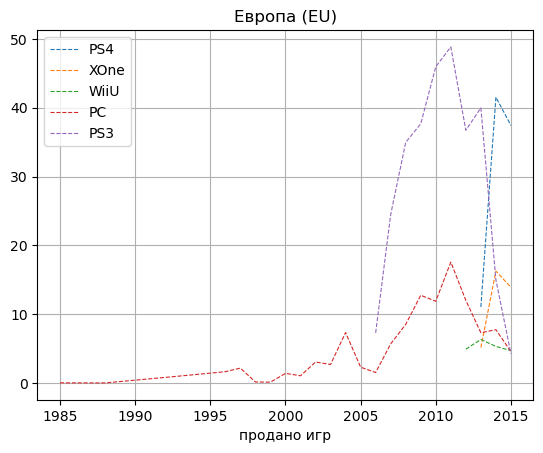

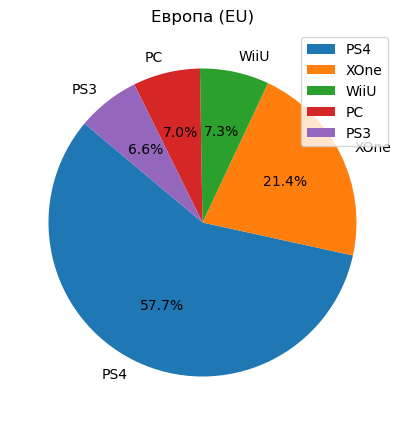

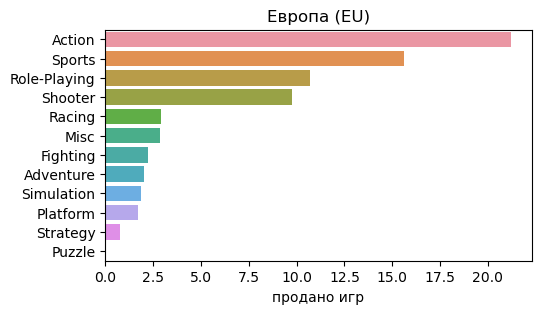

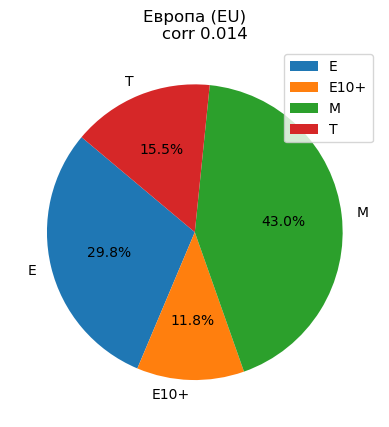

In [21]:
# объемы продаж по платформам в регионе

# автоматизация под другие регионы
region = 'eu_sales'
title = 'Европа (EU)'

# график объема продаж платформ
try:
    # гистограмма №1
    for i in list(data.query('year >= 2015').groupby('platform')[region].sum().nlargest(5).index):
        data[data['platform']==i].groupby('year')[region].sum().plot(label=i,
                                                                            grid=True,
                                                                            linestyle='--',
                                                                            linewidth=0.8)
    plt.title(title)
    plt.xlabel('продано игр')
    plt.ylabel('')
    plt.legend()
    plt.show()

    # гистограмма №2
    plt.figure(figsize=(5, 5))
    data.query('year >= 2015').groupby('platform')[region].sum().nlargest(5).plot.pie(y='sum', autopct='%.1f%%', startangle=140)
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.show()

    # гистограмма №3
    genre_data = data.query('year >= 2015').pivot_table(
                                        index='genre',
                                        values=region,
                                        aggfunc=['count', 'sum'])
    # сброс индекса
    genre_data.columns = [t[0] if t[0] else t[1] for t in genre_data.columns]
    genre_data.sort_values(by='sum', ascending=False, inplace=True)

    plt.figure(figsize=(5.5, 3))
    sns.barplot(x=genre_data['sum'], y=genre_data.index, data=genre_data)
    plt.xlabel('продано игр')
    plt.ylabel('')
    plt.title(title)
    plt.show() 
except:
    print('error')

plt.close('all')

# гистограмма №4
corr = data.query('year >= 2015')[region].corr(data.query('year >= 2015')['age_min'])

rating_data = data.query('year >= 2015').pivot_table(
                                    index='rating',
                                    values= region,
                                    aggfunc=['count','sum'])
# сброс индекса
rating_data.columns = [t[0] if t[0] else t[1] for t in rating_data.columns]
# параметры гистограм
plt.figure(figsize=(5, 5))
plt.close('all')
rating_data.plot.pie(y='sum', autopct='%.1f%%', startangle=140)
plt.title(f'''{title}
    corr {corr:.2}''')
plt.xlabel('')
plt.ylabel('')
plt.show()

В Европе рынок захвачен **PS** по-прежнему остаются актуальными\
игры и для старой версии консоли. И все же  **XOne** также\
на отличном урове.

Популярнейшие жанры:
- экшен
- спорт
- ролевые
- шутер
- аркада
- рейсинг

Основной пользователь 17+. При этом более универсальные рейтинги:\
без ограничений взяли существенную долю рынка. Что\
говорит о регламентировании рынка государством. Зависимости от\
рейтинга не наблюдается.

### JP Япония

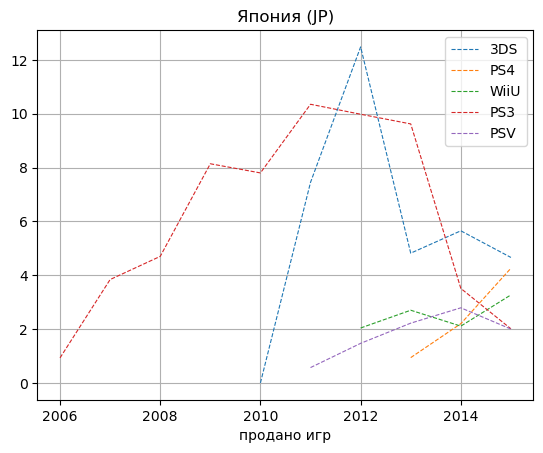

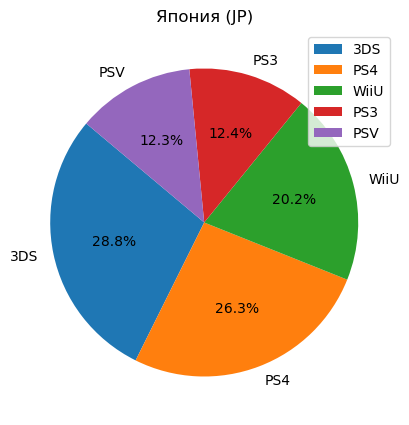

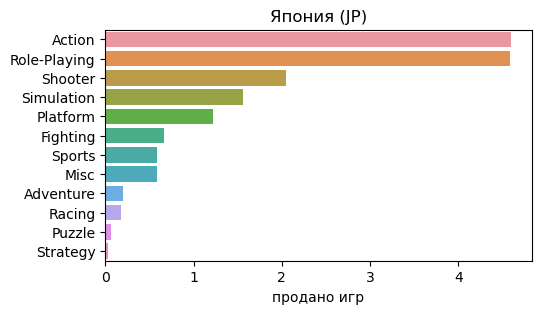

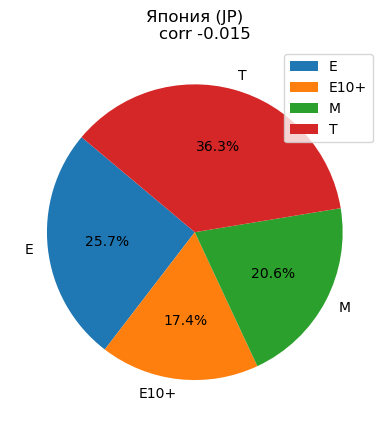

In [22]:
# объемы продаж по платформам в регионе

# автоматизация под другие регионы
region = 'jp_sales'
title = 'Япония (JP)'

# график объема продаж платформ
try:
    # гистограмма №1
    for i in list(data.query('year >= 2015').groupby('platform')[region].sum().nlargest(5).index):
        data[data['platform']==i].groupby('year')[region].sum().plot(label=i,
                                                                            grid=True,
                                                                            linestyle='--',
                                                                            linewidth=0.8)
    plt.title(title)
    plt.xlabel('продано игр')
    plt.ylabel('')
    plt.legend()
    plt.show()

    # гистограмма №2
    plt.figure(figsize=(5, 5))
    data.query('year >= 2015').groupby('platform')[region].sum().nlargest(5).plot.pie(y='sum', autopct='%.1f%%', startangle=140)
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.show()

    # гистограмма №3
    genre_data = data.query('year >= 2015').pivot_table(
                                        index='genre',
                                        values=region,
                                        aggfunc=['count', 'sum'])
    # сброс индекса
    genre_data.columns = [t[0] if t[0] else t[1] for t in genre_data.columns]
    genre_data.sort_values(by='sum', ascending=False, inplace=True)

    plt.figure(figsize=(5.5, 3))
    sns.barplot(x=genre_data['sum'], y=genre_data.index, data=genre_data)
    plt.xlabel('продано игр')
    plt.ylabel('')
    plt.title(title)
    plt.show() 
except:
    print('error')

plt.close('all')

# гистограмма №4
corr = data.query('year >= 2015')[region].corr(data.query('year >= 2015')['age_min'])

rating_data = data.query('year >= 2015').pivot_table(
                                    index='rating',
                                    values= region,
                                    aggfunc=['count','sum'])
# сброс индекса
rating_data.columns = [t[0] if t[0] else t[1] for t in rating_data.columns]
# параметры гистограм
plt.figure(figsize=(5, 5))
plt.close('all')
rating_data.plot.pie(y='sum', autopct='%.1f%%', startangle=140)
plt.title(f'''{title}
    corr {corr:.2}''')
plt.xlabel('')
plt.ylabel('')
plt.show()

Рынок Японии распределен равномерно среди: **PS4**, **3DS**\
и **WiiU**. Если у **3DS** падают продажи, то у свежих\
**WiiU**, **PS4** и **PSV** уверено растут.

Популярнейшие жанры:
- экшен
- ролевые
- шутер
- симулятор

Основной пользователь 13+. При этом игры для более взрослой аудитории\
продаются сильно меньше остальных. Возможно, сильно влияет цензура страны.\
Отрицательная зависимости от рейтинга как будто подтверждает это.

###  Other - остальной мир

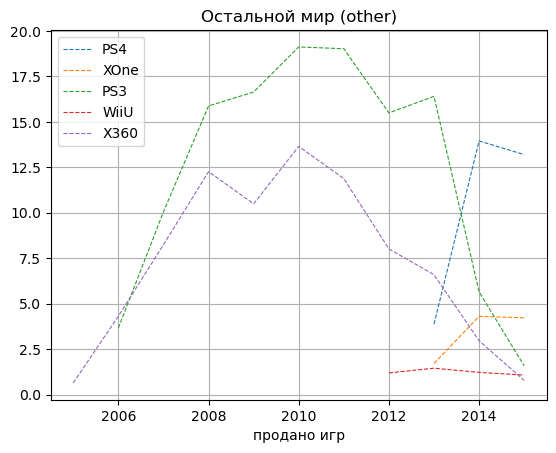

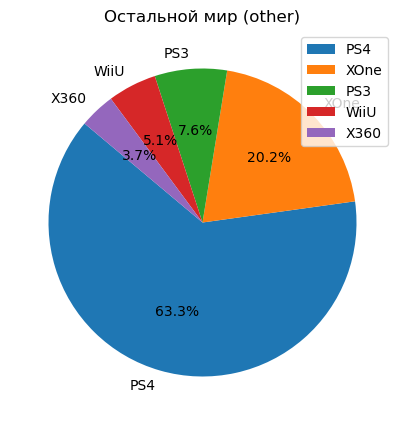

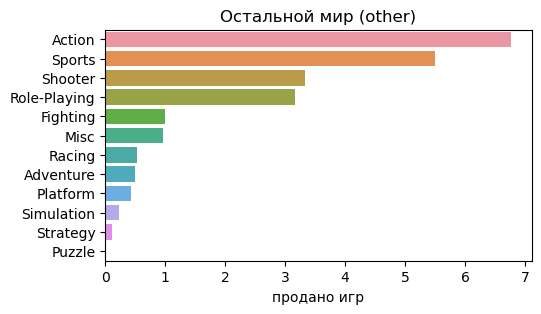

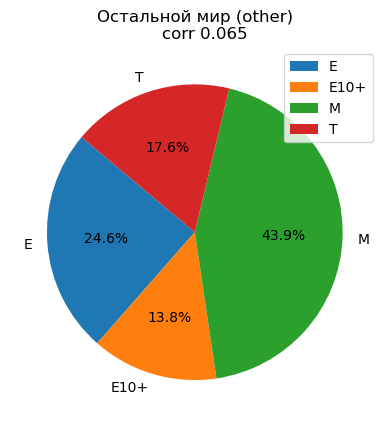

In [23]:
# объемы продаж по платформам в регионе

# автоматизация под другие регионы
region = 'other_sales'
title = 'Остальной мир (other)'

# график объема продаж платформ
try:
    # гистограмма №1
    for i in list(data.query('year >= 2015').groupby('platform')[region].sum().nlargest(5).index):
        data[data['platform']==i].groupby('year')[region].sum().plot(label=i,
                                                                            grid=True,
                                                                            linestyle='--',
                                                                            linewidth=0.8)
    plt.title(title)
    plt.xlabel('продано игр')
    plt.ylabel('')
    plt.legend()
    plt.show()

    # гистограмма №2
    plt.figure(figsize=(5, 5))
    data.query('year >= 2015').groupby('platform')[region].sum().nlargest(5).plot.pie(y='sum', autopct='%.1f%%', startangle=140)
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.show()

    # гистограмма №3
    genre_data = data.query('year >= 2015').pivot_table(
                                        index='genre',
                                        values=region,
                                        aggfunc=['count', 'sum'])
    # сброс индекса
    genre_data.columns = [t[0] if t[0] else t[1] for t in genre_data.columns]
    genre_data.sort_values(by='sum', ascending=False, inplace=True)

    plt.figure(figsize=(5.5, 3))
    sns.barplot(x=genre_data['sum'], y=genre_data.index, data=genre_data)
    plt.xlabel('продано игр')
    plt.ylabel('')
    plt.title(title)
    plt.show() 
except:
    print('error')

plt.close('all')

# гистограмма №4
corr = data.query('year >= 2015')[region].corr(data.query('year >= 2015')['age_min'])

rating_data = data.query('year >= 2015').pivot_table(
                                    index='rating',
                                    values= region,
                                    aggfunc=['count','sum'])
# сброс индекса
rating_data.columns = [t[0] if t[0] else t[1] for t in rating_data.columns]
# параметры гистограм
plt.figure(figsize=(5, 5))
plt.close('all')
rating_data.plot.pie(y='sum', autopct='%.1f%%', startangle=140)
plt.title(f'''{title}
    corr {corr:.2}''')
plt.xlabel('')
plt.ylabel('')
plt.show()

В остальном мире монополия **PS** и все же  **XOne** также\
на отличном урове. Хотя количестве проданных копий "регион"\
удивил. Он сопоставим по объему с Японией.

Популярнейшие жанры:
- экшен
- спорт
- шутер
- ролевые

Основной пользователь 17+. При этом более универсальные рейтинги\
равномерно распределены.

#### Garbege collector

In [24]:
del region, title, genre_data, rating_data, corr